In [10]:
from fastai.vision.all import untar_data
from fastai.vision.all import URLs
from fastai.vision.all import SegmentationDataLoaders
from fastai.vision.all import get_image_files
from fastai.vision.all import np
from fastai.vision.all import unet_learner
from fastai.vision.all import resnet34

path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,3.304046,2.749766,00:07


epoch,train_loss,valid_loss,time
0,2.065778,1.737701,00:01
1,1.697538,1.420147,00:01
2,1.505776,1.267550,00:01
3,1.338393,1.103104,00:01
4,1.195750,0.985859,00:01
5,1.076242,0.872412,00:01
6,0.979553,0.845113,00:01
7,0.902663,0.849033,00:01


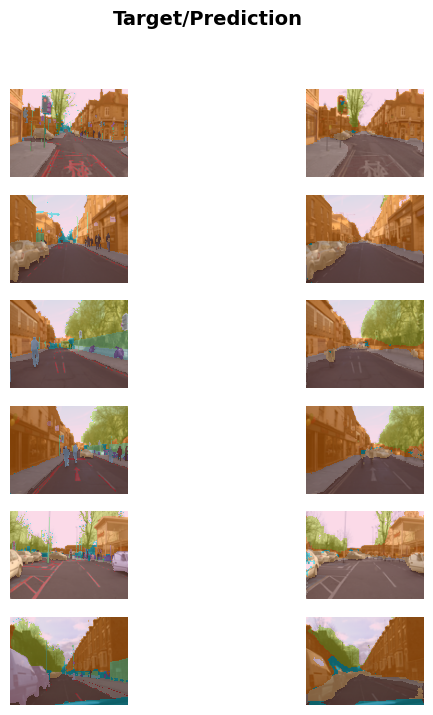

In [11]:
learn.show_results(max_n=6, figsize=(7,8))